# Plot PCA in 2D with dimensions

In [ ]:
from matplotlib import pyplot as plt
from tueplots import bundles
import numpy as np
from matplotlib.patches import Ellipse
import seaborn as sns
import sys
sys.path.append("../")
from src import data, pca

In [2]:
# set NeurIPS theme
plt.rcParams.update(bundles.neurips2021(usetex=True))

## Get data

In [4]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['popularity', 'key', 'id', 'name'])

## Do the PCA
Get eigenvalues, eigenvectors and projected data samples

In [6]:
dat_pca = pop_songs.append(non_pop_songs)
dat_pca = dat_pca.dropna()
eigenvalues, eigenvectors = pca.PCA(dat_pca)

dat_pca_z = (dat_pca-dat_pca.mean(axis=0)) / dat_pca.std(axis=0)

pop_proj = np.asarray(dat_pca_z)[:70,] @ eigenvectors[:,:2]
non_pop_proj = np.asarray(dat_pca_z)[70:,] @ eigenvectors[:,:2]

pc1 = eigenvalues[0] * eigenvectors[:,0]
pc2 = eigenvalues[1] * eigenvectors[:,1]

## Create plot

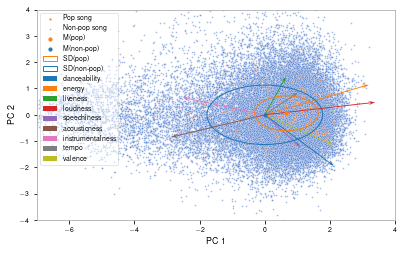

In [11]:
colors = sns.color_palette("muted")
colors2 = sns.color_palette()

plt.figure()
plt.xlim(-7, 4)
plt.ylim(-4, 4)

# plot data points
s = 3
sns.scatterplot(x=non_pop_proj[:,0], y=non_pop_proj[:,1], s=s, color=(*colors[0], 0.5), label="Non-pop song")
sns.scatterplot(x=pop_proj[:,0], y=pop_proj[:,1], s=2*s, color=(*colors[1], 1), label="Pop song")

# plot PCs
num_vecs = pc1.shape[0]
Q = [0] * num_vecs
for i in range(num_vecs):
    Q[i] = plt.quiver(0, 0, pc1[i], pc2[i], scale=5, headwidth=5, headlength=8, width=0.0025, label=f'{pop_songs.columns[i]}', color=plt.cm.tab10.colors[i])

# plot Means
non_pop_mean = np.mean(non_pop_proj, axis=0)
pop_mean = np.mean(pop_proj, axis=0)
plt.scatter(*pop_mean, color=colors2[1], marker="o", s=10, label="M(pop)")
plt.scatter(*non_pop_mean, color=colors2[0], marker="o", s=10, label="M(non-pop)")

# add mahalanobis unit circle per group
ax = plt.gca()
pop_var = np.std(pop_proj, axis=0)
ax.add_patch(Ellipse((pop_mean[0], pop_mean[1]),2*pop_var[0],2*pop_var[1], facecolor='none', edgecolor=colors2[1], label="SD(pop)"))
non_pop_var = np.std(non_pop_proj, axis=0)
ax.add_patch(Ellipse((non_pop_mean[0], non_pop_mean[1]),2*non_pop_var[0],2*non_pop_var[1], facecolor='none', edgecolor=colors2[0], label="SD(non-pop)"))



ax.spines['top'].set_color('#aaa')
ax.spines['right'].set_color('#aaa')
ax.spines['bottom'].set_color('#aaa')
ax.spines['left'].set_color('#aaa')

# add legend
handles, labels = ax.get_legend_handles_labels()
order = [1,0,11,12,13,14,2,3,4,5,6,7,8,9,10]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], framealpha=0.5)

# axis labels
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.savefig("001_pca.pdf")
plt.show()
